<a href="https://colab.research.google.com/github/ARGF0RCE/Shiny-TF-DC-UC-Resources/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... *predicting a number*.

In [21]:
## Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.7.0


## Creating data to view and fit

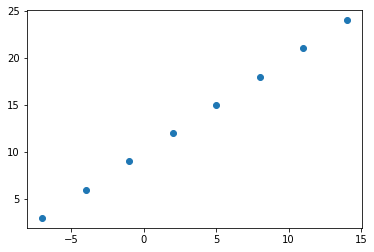

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])

# Create labels
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])

# Visualize it
plt.scatter(X, y);

In [23]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [24]:
# X.shape, y.shape
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_price, house_info

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>)

In [25]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [26]:
# Turn our NumPy arrays into Tensors with dtype float32
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

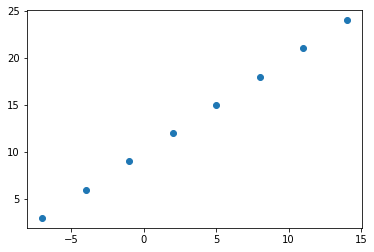

In [27]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function, optimizer and evaluation metrics
3. **Fitting the model** - letting the model try to find patterns between `X` & `y`.

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=['mae'])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 117ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 1ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 1ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 1ms/step - loss: 10.9748 - mae: 10.9748


In [29]:
# Checkout X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
# Try and make a prediction using our model
y_pred = model.predict([[17.]])

In [31]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving the model

We can improve the model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the *learning rate* of the optimization function.
3. **Fitting a model** - here we might fit a model for more *epochs* or on *more data*.

In [32]:
# Let's build rebuild our model
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 129ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 993us/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 

In [33]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [34]:
# Predict using the updated model
model.predict([[17.0]])

array([[30.158512]], dtype=float32)

In [35]:
# Rebuilding the model, again!
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model, again for 100 epochs
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 130ms/step - loss: 12.3880 - mae: 12.3880
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 11.8471 - mae: 11.8471
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 11.2973 - mae: 11.2973
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 10.7332 - mae: 10.7332
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 10.1467 - mae: 10.1467
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 9.5323 - mae: 9.5323
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 8.8876 - mae: 8.8876
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 8.2074 - mae: 8.2074
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 7.4906 - mae: 7.4906
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 6.7282 - mae: 6.7282
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - l

In [36]:
# Now predict the results
model.predict([[17.]])

array([[31.175188]], dtype=float32)

In [37]:
# Rebuild the model, till you drop (just kidding);)!
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 155ms/step - loss: 12.0406 - mae: 12.0406
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 10.9698 - mae: 10.9698
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 9.8715 - mae: 9.8715
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 8.7363 - mae: 8.7363
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 7.5533 - mae: 7.5533
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 6.9063 - mae: 6.9063
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 7.5343 - mae: 7.5343
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 8.2001 - mae: 8.2001
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - loss: 8.2804 - mae: 8.2804
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 7.9694 - mae: 7.9694
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 7

In [38]:
# Now let's predict again
model.predict([[17.]])

array([[25.978287]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you go through when building neural networks

```
Build a model -> fit it -> Evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ...
```

When it comes to evaluation... there are three words you should memorize:

> "Visualize, Visualize, Visualize"

In [39]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [40]:
# Make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

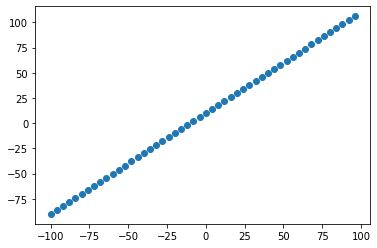

In [41]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [42]:
### The 3 sets ...